In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


### Dropping unneccessary columns

In [6]:
df.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)
# already droped so error occurs

Checking for null value

In [7]:
df.isnull().sum()   #sometimes you may need to write df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

### some visualization

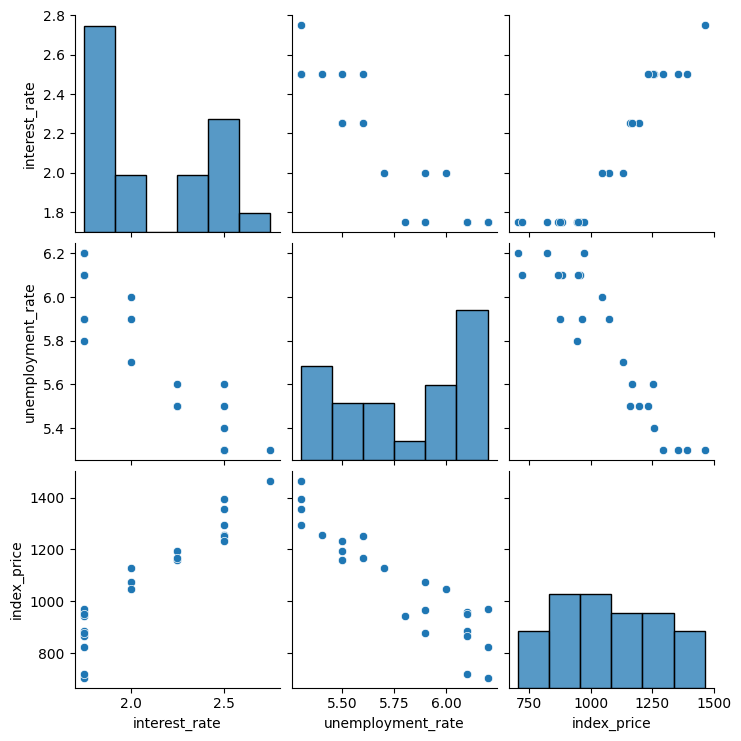

In [8]:
import seaborn as sns
sns.pairplot(df)

checking correlation

In [9]:
df.corr()   # it has some negative corelation

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


visualize datapoints mmore closely

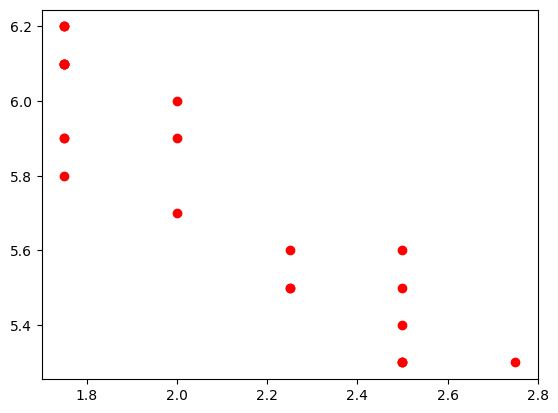

In [10]:
plt.scatter(df['interest_rate'], df["unemployment_rate"], color="r")    # you can see a inverse relationship

## independent and dependent feature

In [11]:
X = df[["interest_rate", "unemployment_rate"]] #or df.iloc[:, :-1]
y = df["index_price"]
print(X)

    interest_rate  unemployment_rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1


In [12]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

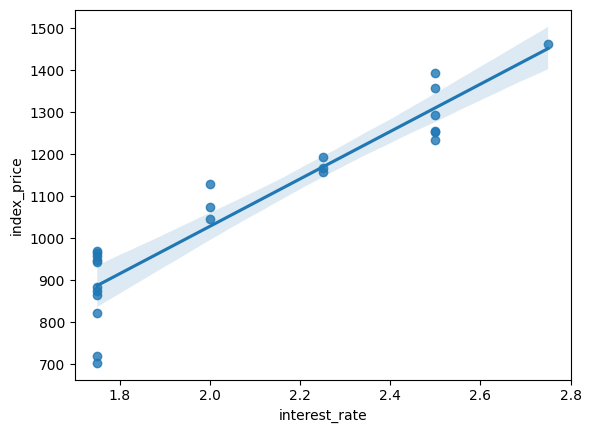

In [14]:
sns.regplot(x = df["interest_rate"], y = df["index_price"], data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

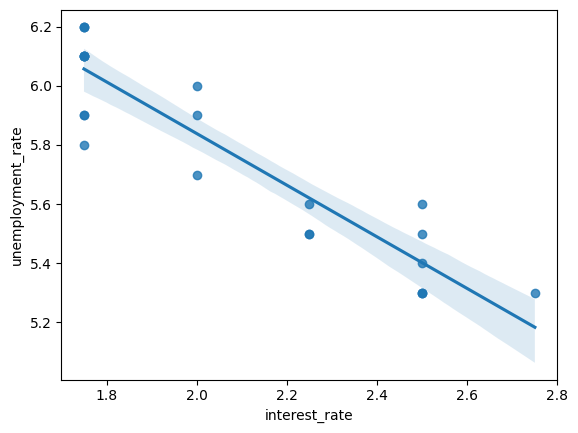

In [15]:
sns.regplot(x = df["interest_rate"], y = df["unemployment_rate"], data=df)
# inverse relationship

## Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [33]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)
print(regression.coef_)

[  88.27275507 -116.25716066]


In [19]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring="neg_mean_squared_error", cv = 3)
print(validation_score)
print(np.mean(validation_score))

[-4921.61331265 -7686.87497294 -5135.9962549 ]
-5914.828180162386


### preediction

In [20]:
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

### performance metrics

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


### r2 and adjusted r2

In [24]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)
adjusted_score = 1-(1-score)*(len(y_test)-1)/((len(y_test)-X_test.shape[1]-1))
print(adjusted_score)

0.7591371539010257
0.5985619231683761


### assumptions

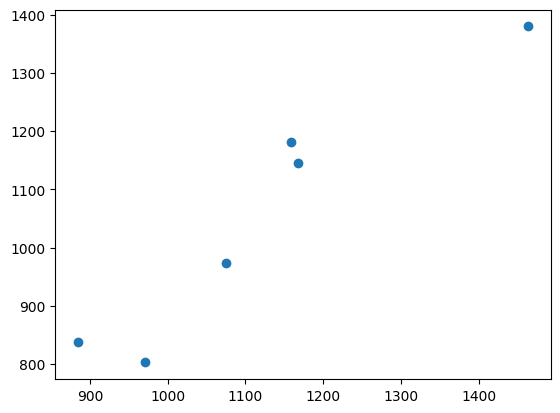

In [26]:
plt.scatter(y_test, y_pred)

In [27]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


### plot this residuals using displot

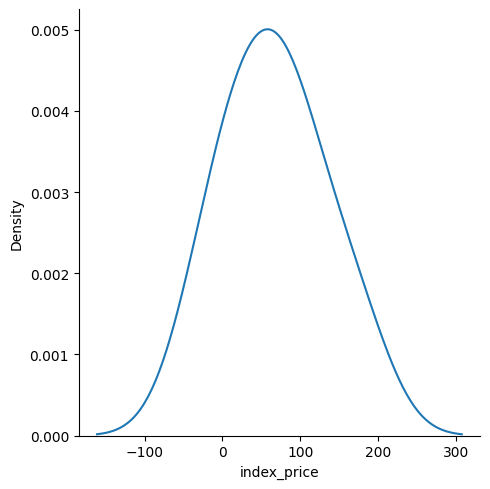

In [30]:
sns.displot(residuals, kind = 'kde')

## scatter plot with respect to residuals and prediction 

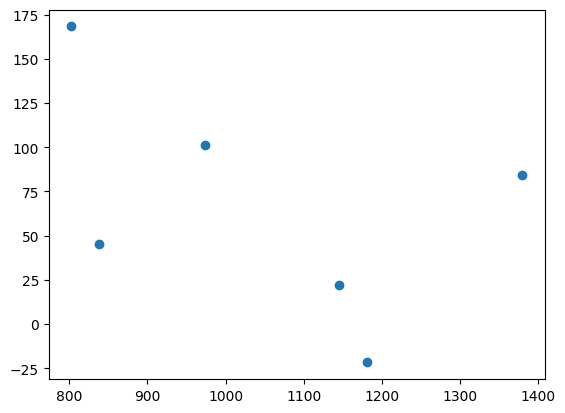

In [31]:
plt.scatter(y_pred, residuals)

In [32]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

c:\Users\patil\Desktop\ML_Models_Implementation\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 29 Aug 2024   Prob (F-statistic):                       0.754
Time:                        10:59:58   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
regression.predict(scaler.transform([[2.75, 5.30]]))

c:\Users\patil\Desktop\ML_Models_Implementation\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1379.83457045])